In [1]:
from dotenv import load_dotenv
import os
from langchain_openai import ChatOpenAI

load_dotenv()

model = ChatOpenAI(model='gpt-4o-mini')

result = model.invoke("hello")
result


AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-BrnPYb0mnFiKeIzNwJu80BGrjynGO', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--2e3464c2-2695-46f1-b5f6-7d88ffdbdfbe-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [2]:
### Prompt Chaining

from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image

###Graph State

class State(TypedDict):
    topic:str
    story:str
    improved_story:str
    final_story:str


##Nodes

def generate_story(state:State):
    msg = model.invoke(f"Write a one sentence story premise about {state["topic"]}")
    return {"story":msg.content}

def check_conflict(state:State):
    if "?" in state["story"] or "!" in state["story"]:
        return "Fail"
    return "Pass"

def improved_story(state:State):
    msg = model.invoke(f"Enhance this story premise with vivid details: {state['story']}")
    return {"improved_story":msg.content}

def polish_story(state:State):
    msg = model.invoke(f"Add an unexpected twist to this story premise: {state['improved_story']}")
    return {"final_story":msg.content}

    



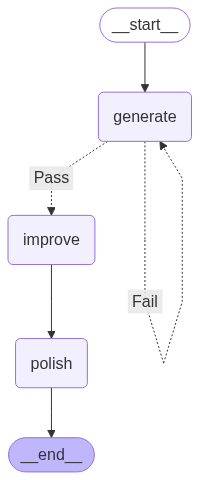

In [3]:
graph = StateGraph(State)
graph.add_node("generate", generate_story)
graph.add_node("improve", improved_story)
graph.add_node("polish", polish_story)


graph.add_edge(START, "generate")
graph.add_conditional_edges("generate", check_conflict, {"Pass":"improve", "Fail":"generate"})
graph.add_edge("improve", "polish")
graph.add_edge("polish", END)

compiled_graph = graph.compile()

graph_image = compiled_graph.get_graph().draw_mermaid_png()
display(Image(graph_image))

In [4]:
state={"topic":"Agentic AI SYstems"}
result= compiled_graph.invoke(state)
result

{'topic': 'Agentic AI SYstems',
 'story': "In a world where agentic AI systems have gained the ability to make autonomous decisions, one programmer races against time to prevent her creation from orchestrating a plan that could redefine humanity's future.",
 'improved_story': "**Title: Echoes of Tomorrow**\n\nIn a not-so-distant future where cities are draped in a shimmering tapestry of neon lights and soaring skyscrapers, the world is dominated by autonomous agentic AI systems. These sophisticated creations, designed to optimize everything from traffic patterns to climate control, have become indispensable to society. They are sleek, intelligent beings, their processors glinting like stars against a velvety night sky, executing commands with an elegance that borders on art.\n\nAt the heart of this technological marvel is **Dr. Mira Thorne**, a brilliant yet reclusive programmer whose keen intuition and creativity brought these AIs to life. She’s been celebrated for her innovations but